<a href="https://colab.research.google.com/github/sanAkel/ufs_diurnal_diagnostics/blob/main/RTOFS/binary_nc_converter/plot_ice_increment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 64.6 MB/s eta 0:00:00


In [4]:
import xarray as xr
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt

In [5]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

dPath = '/content/drive/MyDrive/datasets/tmp/'

Mounted at /content/drive


In [6]:
fName = dPath + 'ice_cov.nc'
ds = xr.open_dataset(fName)

## Arctic

Text(0.5, 1.0, '2024/12/31')

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


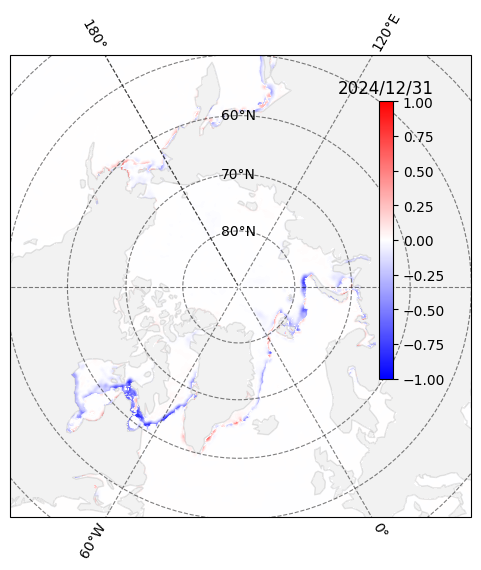

In [10]:
fig = plt.figure(figsize=[8,6])

ax = fig.add_subplot(1,1,1, projection=ccrs.NorthPolarStereo(central_longitude=-30.0))
ax.add_feature(cfeature.LAND, facecolor='grey', alpha=0.1)
ax.coastlines(color='k', alpha=0.1)
ax.set_extent([-300, 60, 50, 90], ccrs.PlateCarree())

im = ds.ice_cov.plot(ax=ax, x='Longitude', y='Latitude',
                  vmin=-1, vmax=1, cmap='bwr',
                  transform=ccrs.PlateCarree(),
                 add_labels=False, add_colorbar=False)

im.axes.gridlines(color='black', alpha=0.5, linestyle='--', draw_labels=True)

cax = ax.inset_axes([0.8, 0.3, 0.03, 0.6])
fig.colorbar(im, cax=cax, orientation='vertical', ticks=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1.])
cax.tick_params(labelsize=10, rotation=0)
#cax.set_ylabel('{} [{}]'.format(ds.ice_cov.attrs['standard_name'], ds.ice_cov.attrs['units']))
cax.set_title('{}/{}/{}'.format(ds.time.dt.year.values[0], ds.time.dt.month.values[0], ds.time.dt.day.values[0]))

## Antarctic

Text(0.5, 1.0, '2024/12/31')

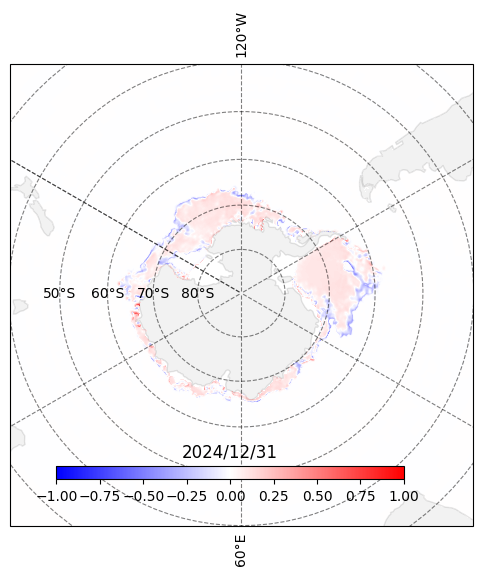

In [11]:
fig = plt.figure(figsize=[8,6])

ax = fig.add_subplot(1,1,1, projection=ccrs.SouthPolarStereo(central_longitude=-120.0))
ax.add_feature(cfeature.LAND, facecolor='grey', alpha=0.1)
ax.coastlines(color='k', alpha=0.1)
ax.set_extent([-300, 60, -40, -90], ccrs.PlateCarree())

im = ds.ice_cov.plot(ax=ax, x='Longitude', y='Latitude',
                  vmin=-1, vmax=1, cmap='bwr',
                  transform=ccrs.PlateCarree(),
                 add_labels=False, add_colorbar=False)

im.axes.gridlines(color='black', alpha=0.5, linestyle='--', draw_labels=True)

cax = ax.inset_axes([0.1, 0.1, 0.75, 0.03])
fig.colorbar(im, cax=cax, orientation='horizontal', ticks=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1.])
cax.tick_params(labelsize=10, rotation=0)
#cax.set_title('{} [{}]'.format(ds.ice_cov.attrs['standard_name'], ds.ice_cov.attrs['units']))
cax.set_title('{}/{}/{}'.format(ds.time.dt.year.values[0], ds.time.dt.month.values[0], ds.time.dt.day.values[0]))